In [1]:
#importação da base de dados
from sklearn.datasets import load_wine

#bibliotecas para manipulação e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#bibliotecas para classificação
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#bibliotecas para analise dos modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

# Manuseando os dados

In [2]:
dataset = load_wine()

In [3]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df["CLASS"] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
corr = df.corr() 
print(corr)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
CLASS                        -0.328222    0.437776 -0.049643   

                              alcalinit

In [6]:
# Criando um dataframe apenas com um subconjunto de atributos escolhidos para análise com base na correlação
X = pd.DataFrame(np.c_[df['flavanoids'], df['proline']], columns = ['flavanoids','proline'])
y = df["CLASS"]
data = pd.concat([X, y], axis=1)

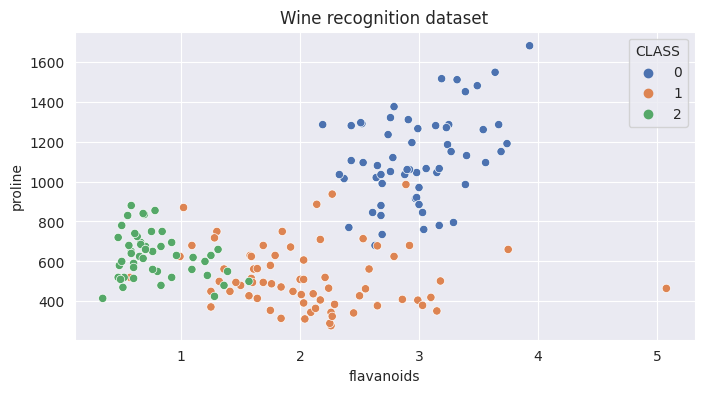

In [7]:
# Visualizando o conjunto de dados
plt.figure(figsize=(8,4))
sns.scatterplot(x='flavanoids', y='proline', data = data, hue = 'CLASS', palette="deep").set(title='Wine recognition dataset')
plt.show()

# Treinamento dos modelos

In [8]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
#treinando os classificadores
KNN = KNeighborsClassifier(n_neighbors = 5)
LR = LogisticRegression(max_iter = 500, random_state = 0)
SVML = SVC(kernel="linear", C=0.025)
SVM = SVC(gamma=2, C=1)
GAU = GaussianProcessClassifier(1.0 * RBF(1.0))
TREE = DecisionTreeClassifier(max_depth=5)
FOREST = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
ADA = AdaBoostClassifier()
NAIVE = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()

In [10]:
KNN.fit(x_treino, y_treino)
LR.fit(x_treino, y_treino)
SVML.fit(x_treino, y_treino)
SVM.fit(x_treino, y_treino)
GAU.fit(x_treino, y_treino)
TREE.fit(x_treino, y_treino)
FOREST.fit(x_treino, y_treino)
ADA.fit(x_treino, y_treino)
NAIVE.fit(x_treino, y_treino)
QDA.fit(x_treino, y_treino)

QuadraticDiscriminantAnalysis()

In [11]:
clfs = [KNN, LR, SVML, SVM, GAU, TREE, FOREST, ADA, NAIVE, QDA]

# Análise e comparação dos modelos

In [12]:
#Função que chama os modelos treinados e plota os gráficos para análise

def comparacao(clfs):
    for clf in clfs:
        
        #configurações de exibição dos gráficos
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        fig.suptitle('Modelo %s' %str(clf), fontsize=16, y=1.08)
        ax1.set_title('Relatório de classificação')
        ax2.set_title('Matriz de confusão')
        ax3.set_title('Visualização do limite de decisão')
        
        #realização das predições na base de teste 
        predicoes = clf.predict(x_teste)
        
        #criação do relatório de classificação e exibição em formato de mapa de calor
        clf_report = classification_report(y_teste, predicoes, labels=LR.classes_, output_dict=True)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Spectral", ax=ax1)
        
        #criação e exibição da matriz de confusão
        cm = confusion_matrix(y_teste, predicoes, labels=LR.classes_)
        disp_LR_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp_LR_matrix.plot(ax=ax2)
        
        #criação e exibição dos limites de decisão do modelos
        disp = DecisionBoundaryDisplay.from_estimator(clf, x_teste, response_method="predict", 
                                                      xlabel='flavanoids', ylabel='proline',alpha=0.5, ax=ax3)
        disp.ax_.scatter(X.loc[:, :'flavanoids'], X.loc[:, 'proline':], c=y, edgecolor="k")
        
    plt.show()

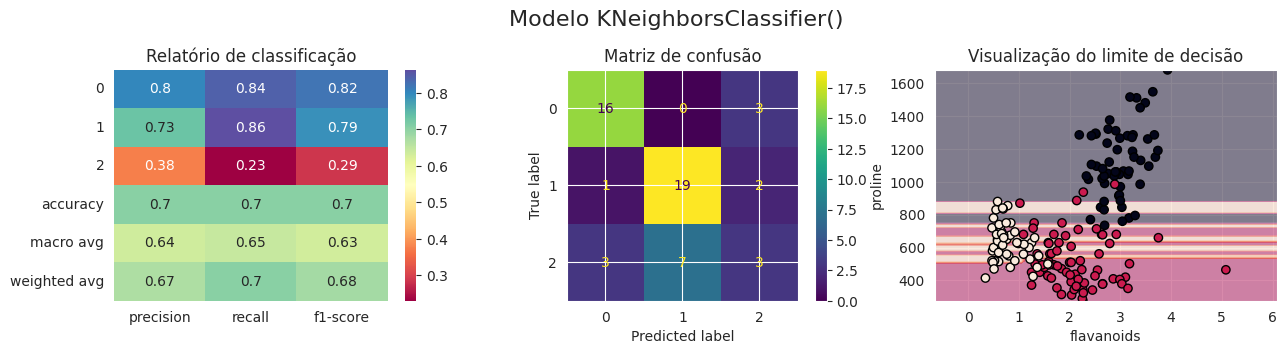

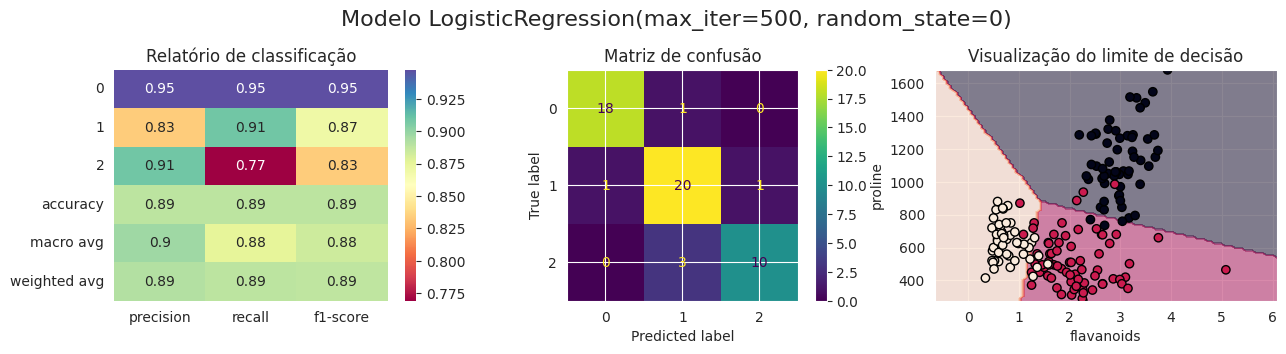

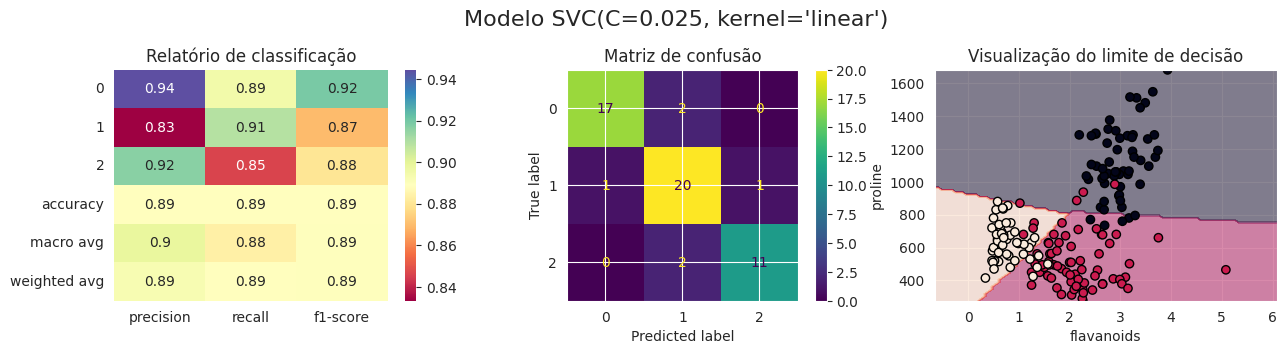

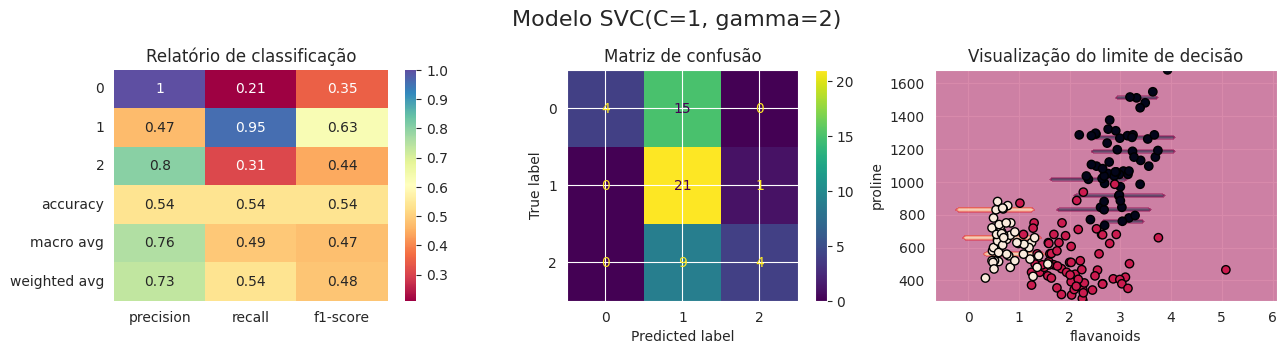

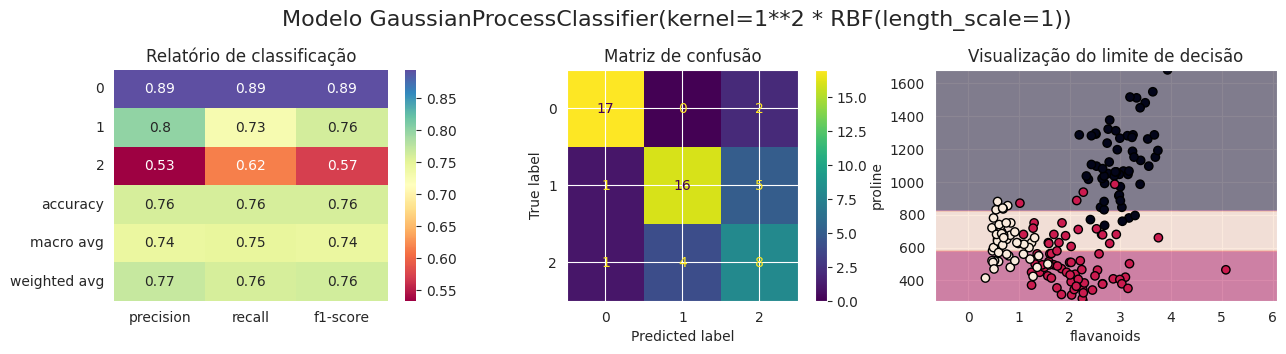

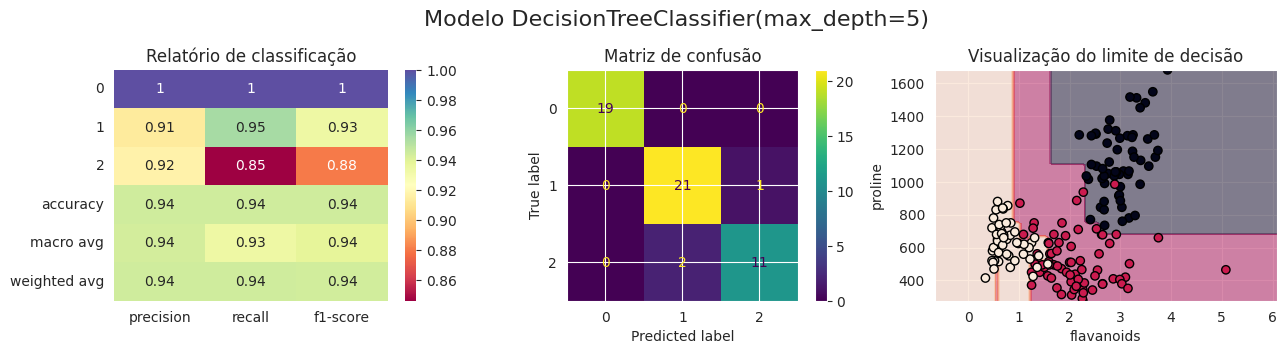

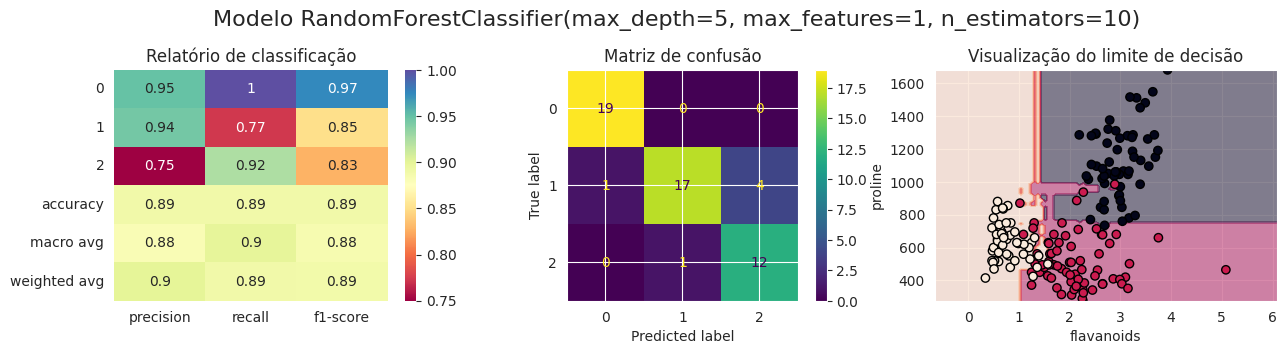

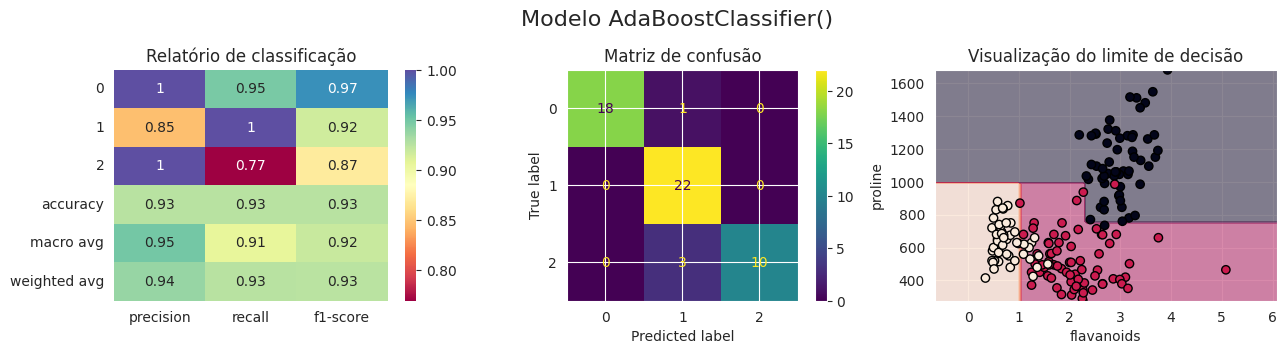

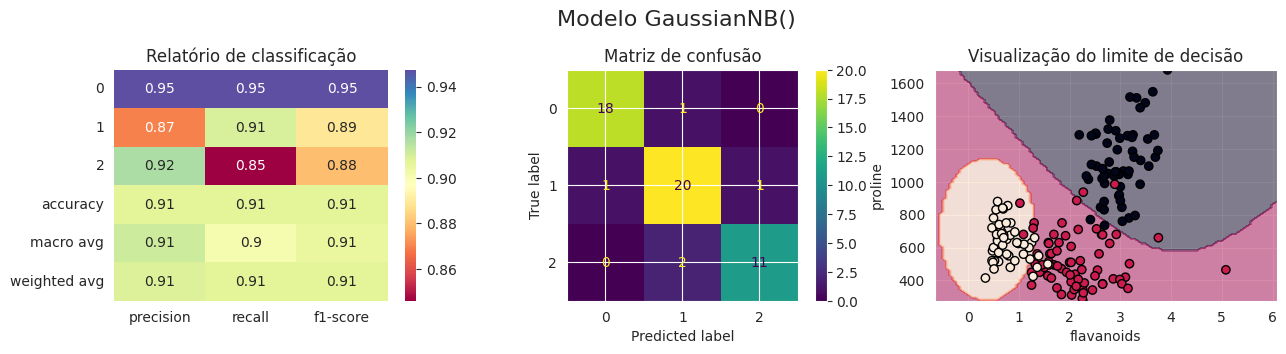

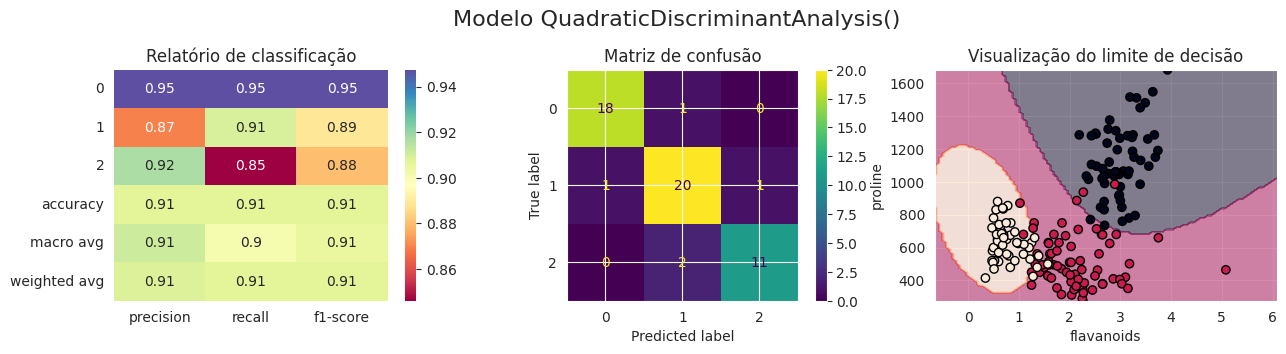

In [13]:
comparacao(clfs)

# Manuseando os dados

In [2]:
dataset = load_wine()

In [3]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df["CLASS"] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,CLASS
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
corr = df.corr() 
print(corr)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
CLASS                        -0.328222    0.437776 -0.049643   

                              alcalinit

In [6]:
# Criando um dataframe apenas com um subconjunto de atributos escolhidos para análise com base na correlação
X = pd.DataFrame(np.c_[df['flavanoids'], df['proline']], columns = ['flavanoids','proline'])
y = df["CLASS"]
data = pd.concat([X, y], axis=1)

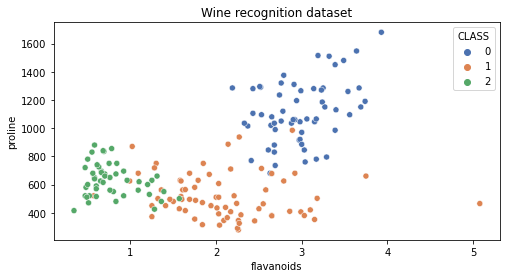

In [23]:
# Visualizando o conjunto de dados
plt.figure(figsize=(8,4))
sns.scatterplot(x='flavanoids', y='proline', data = data, hue = 'CLASS', palette="deep").set(title='Wine recognition dataset')
plt.show()

# Treinamento dos modelos

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
#treinando os classificadores
KNN = KNeighborsClassifier(n_neighbors = 5)
LR = LogisticRegression(max_iter = 500, random_state = 0)
SVML = SVC(kernel="linear", C=0.025)
SVM = SVC(gamma=2, C=1)
GAU = GaussianProcessClassifier(1.0 * RBF(1.0))
TREE = DecisionTreeClassifier(max_depth=5)
FOREST = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
ADA = AdaBoostClassifier()
NAIVE = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()

In [12]:
KNN.fit(x_treino, y_treino)
LR.fit(x_treino, y_treino)
SVML.fit(x_treino, y_treino)
SVM.fit(x_treino, y_treino)
GAU.fit(x_treino, y_treino)
TREE.fit(x_treino, y_treino)
FOREST.fit(x_treino, y_treino)
ADA.fit(x_treino, y_treino)
NAIVE.fit(x_treino, y_treino)
QDA.fit(x_treino, y_treino)

QuadraticDiscriminantAnalysis()

In [13]:
clfs = [KNN, LR, SVML, SVM, GAU, TREE, FOREST, ADA, NAIVE, QDA]

# Análise e comparação dos modelos

In [14]:
#Função que chama os modelos treinados e plota os gráficos para análise

def comparacao(clfs):
    for clf in clfs:
        
        #configurações de exibição dos gráficos
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        fig.suptitle('Modelo %s' %str(clf), fontsize=16, y=1.08)
        ax1.set_title('Relatório de classificação')
        ax2.set_title('Matriz de confusão')
        ax3.set_title('Visualização do limite de decisão')
        
        #realização das predições na base de teste 
        predicoes = clf.predict(x_teste)
        
        #criação do relatório de classificação e exibição em formato de mapa de calor
        clf_report = classification_report(y_teste, predicoes, labels=LR.classes_, output_dict=True)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Spectral", ax=ax1)
        
        #criação e exibição da matriz de confusão
        cm = confusion_matrix(y_teste, predicoes, labels=LR.classes_)
        disp_LR_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp_LR_matrix.plot(ax=ax2)
        
        #criação e exibição dos limites de decisão do modelos
        disp = DecisionBoundaryDisplay.from_estimator(clf, x_teste, response_method="predict", 
                                                      xlabel='flavanoids', ylabel='proline',alpha=0.5, ax=ax3)
        disp.ax_.scatter(X.loc[:, :'flavanoids'], X.loc[:, 'proline':], c=y, edgecolor="k")
        
    plt.show()

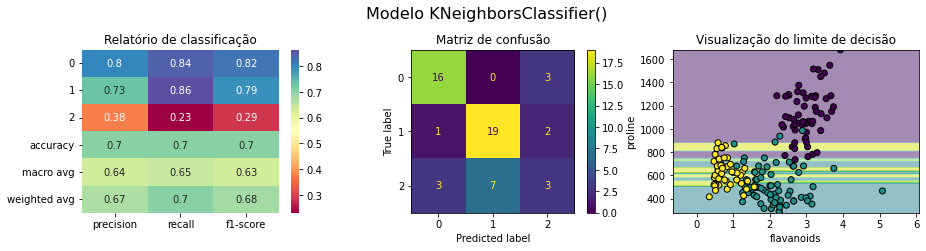

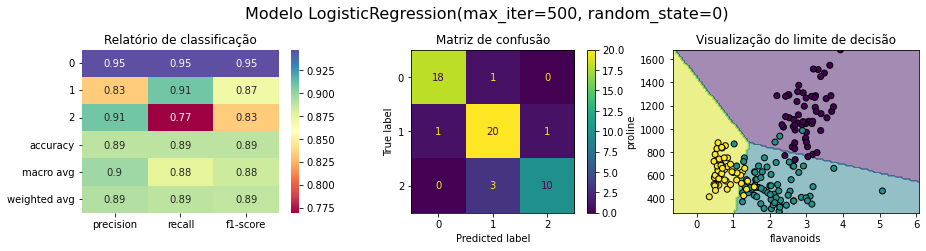

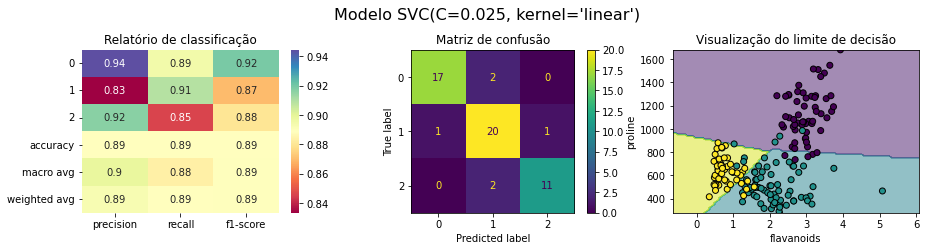

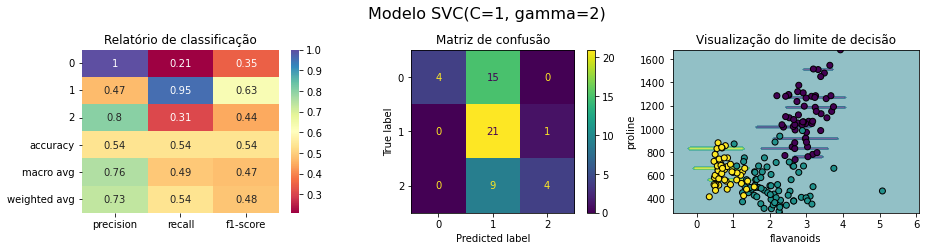

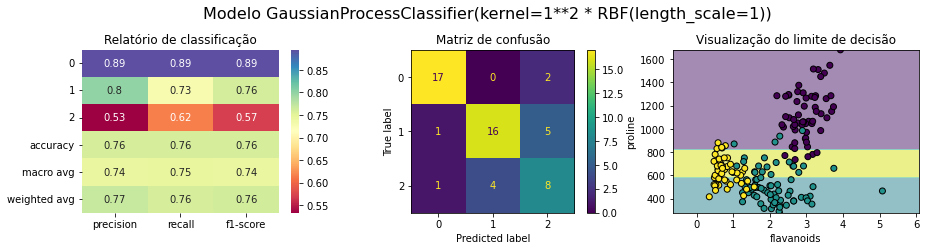

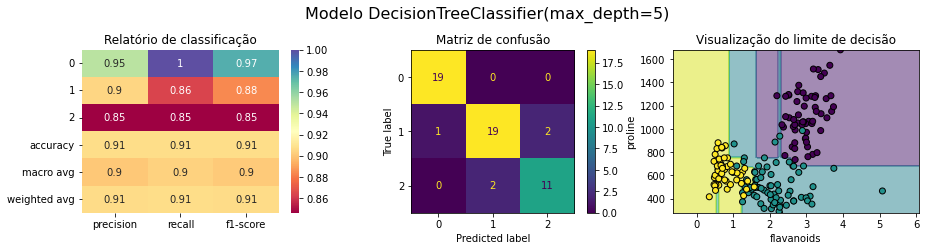

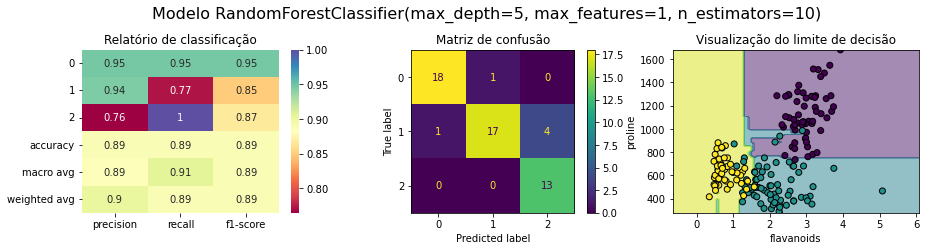

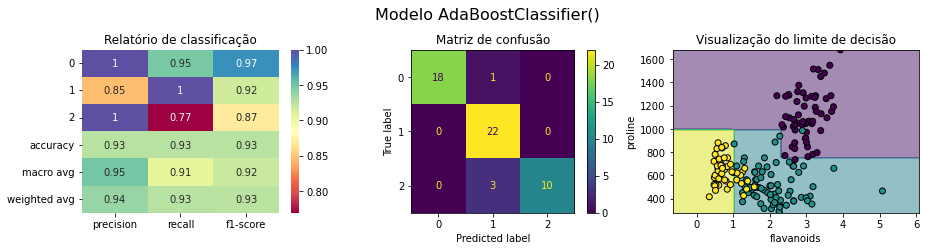

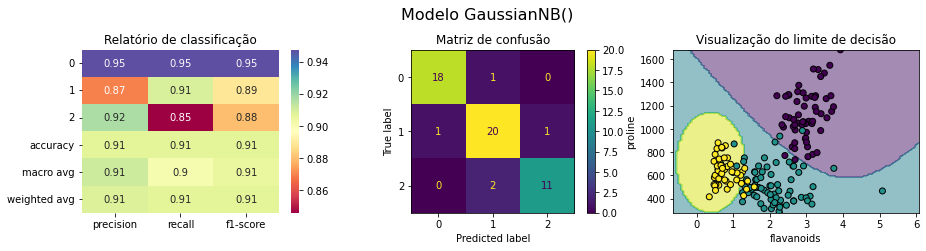

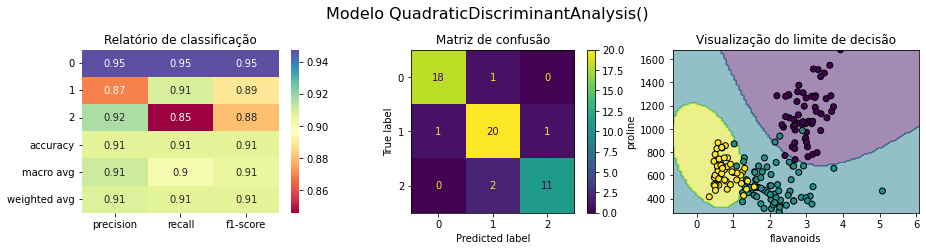

In [15]:
comparacao(clfs)